<a href="https://colab.research.google.com/github/rahulvenkat207/Linear-Algebra-CodingWay/blob/main/Diagonalization/Diagonalization_Notebook2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

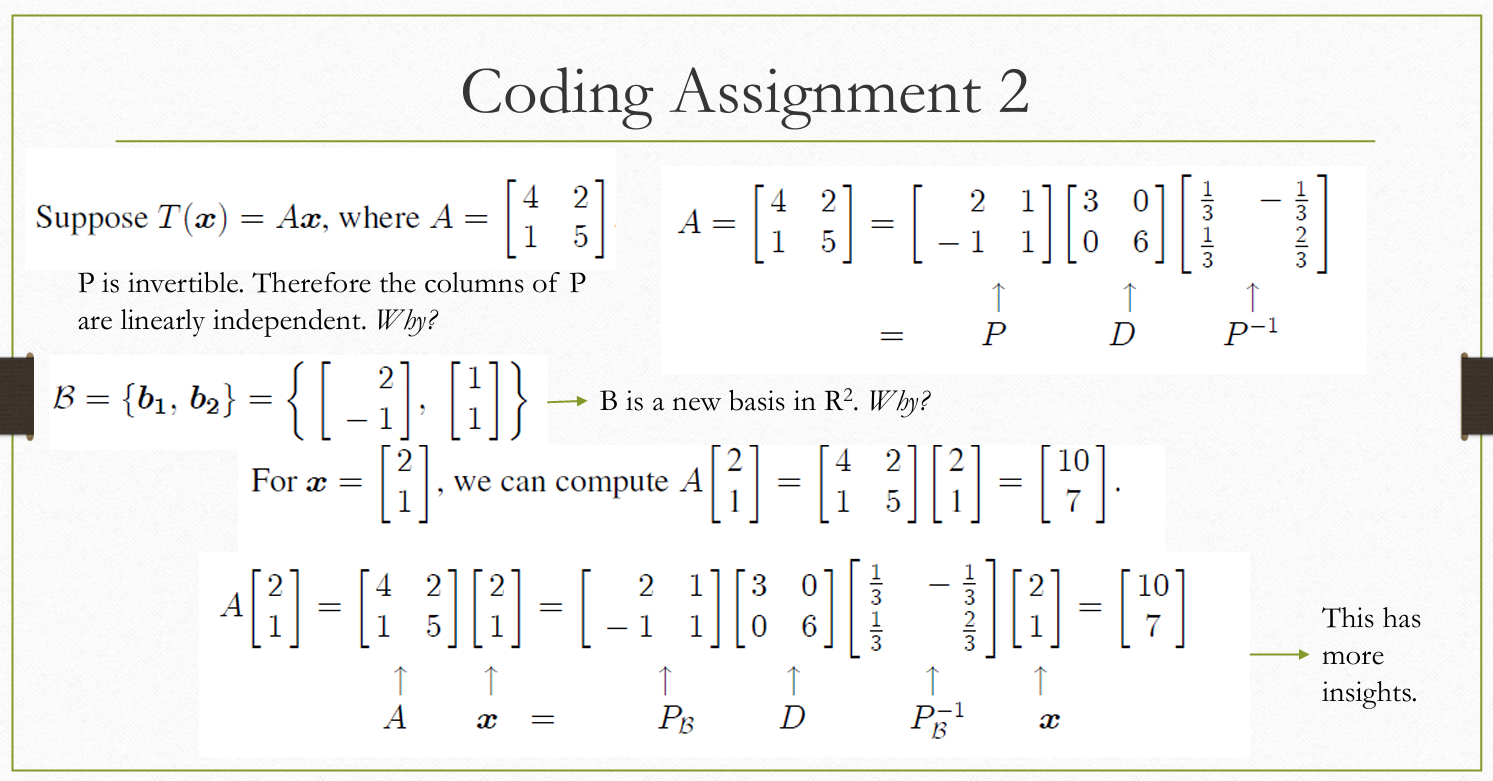

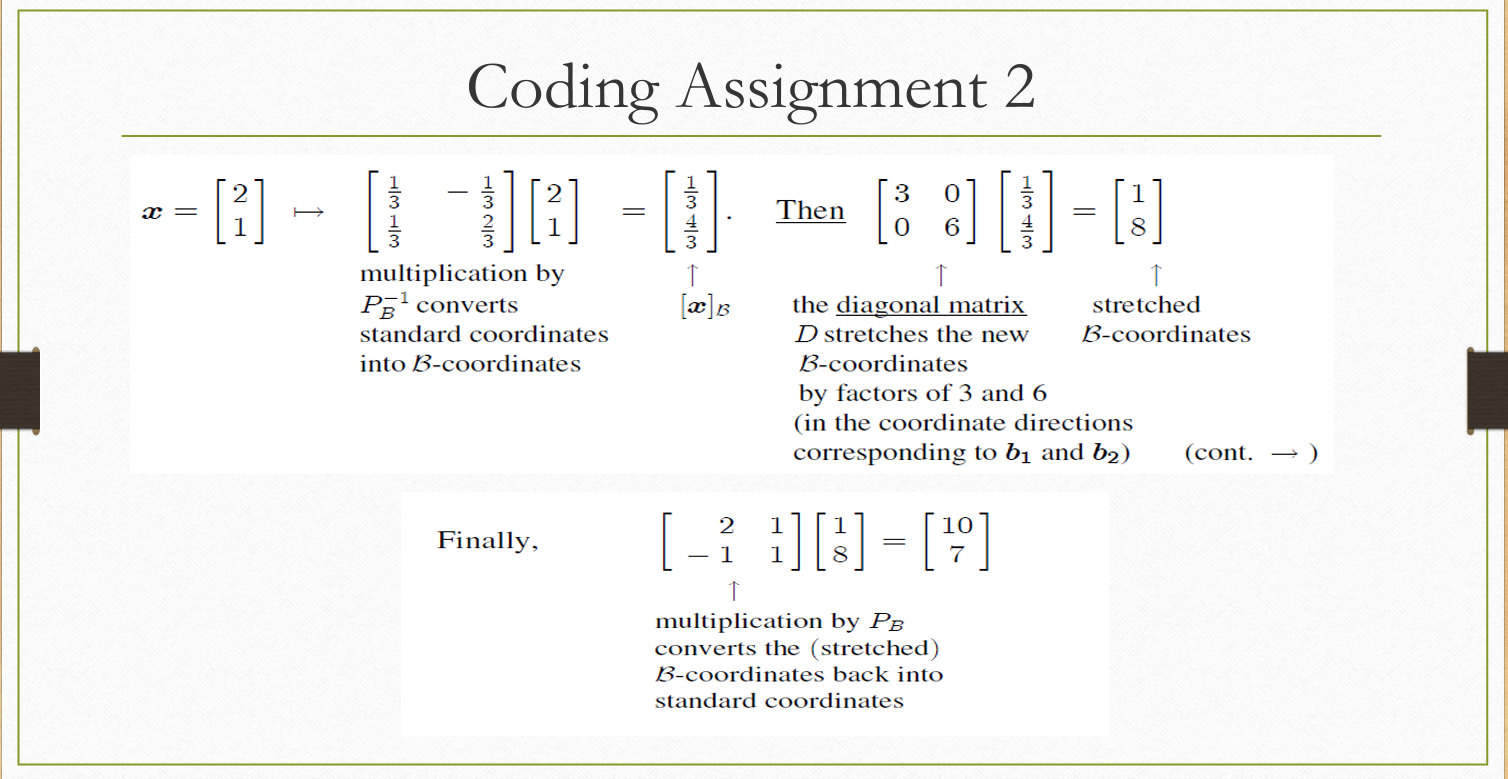

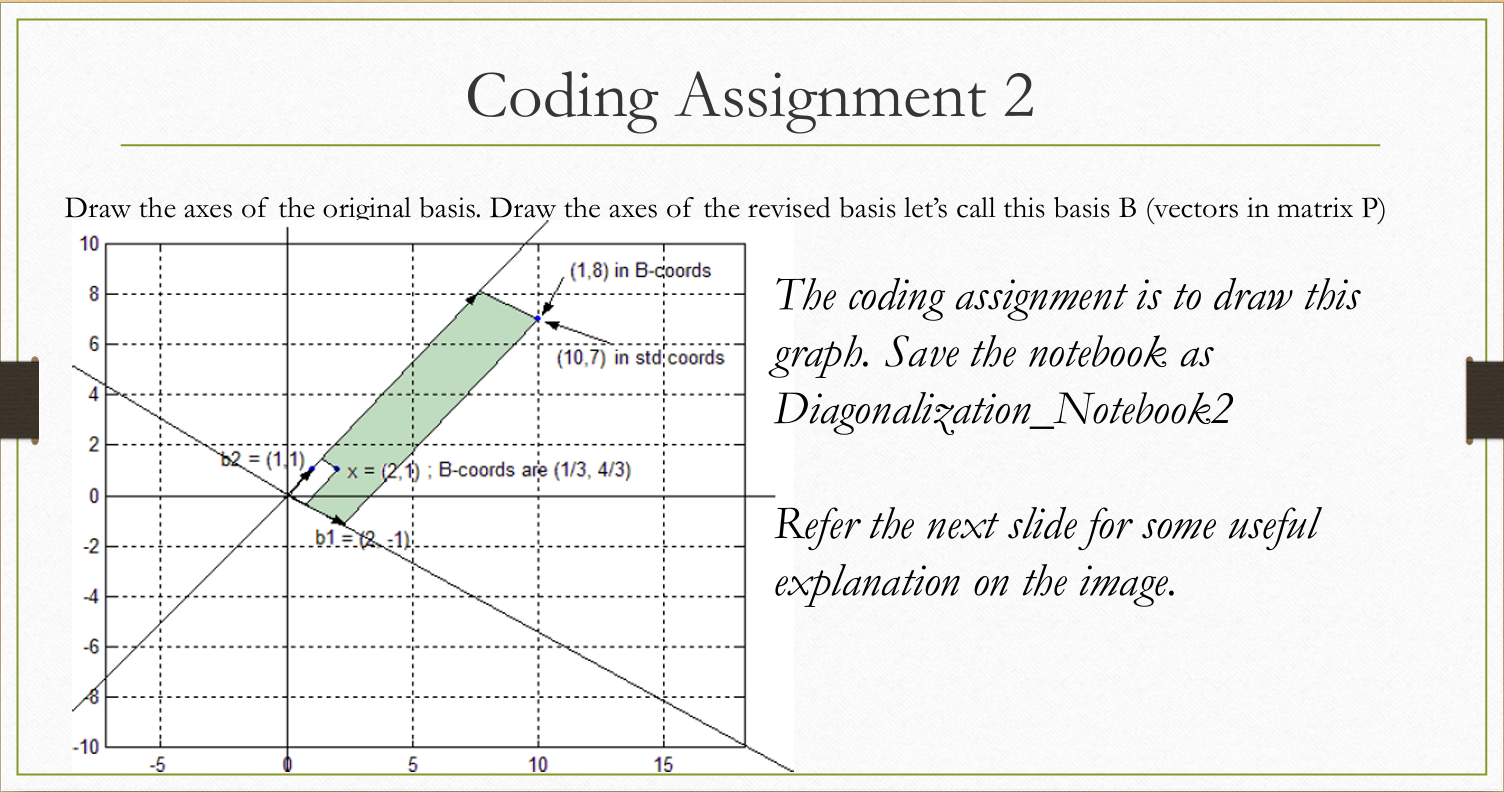

In [9]:
from IPython.display import Image, display

# Assuming you have images named 'image1.png', 'image2.png', and 'image3.png'
image_paths = ['/content/Screenshot 2024-05-17 200014.png', '/content/Screenshot 2024-05-17 200042.png', '/content/Screenshot 2024-05-17 200102.png']

# Display each image
for path in image_paths:
    display(Image(filename=path))




# P is invertible.Therefore the columns of P are linearly independent.Why

The Reduced Row Echelon Form (RREF) of an invertible matrix P being an identity matrix I implies that every column in P contains a pivot elements

The presence of pivot positions in every column of the RREF indicates that the columns of P are linearly independent.

# B={b1,b2}={[2,-1],[1,1]} is a new basis in R.Why?

Linear Independence:In this case, neither vector [2,−1] nor [1,1] is a scalar multiple of the other, so the set is linearly independent.

Spanning: B spans R2 if any vector in R2 can be expressed as a linear combination of the vectors in B.

# Importing Libraries

In [10]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [11]:
def diagonalize_matrix(A):
    # Convert A to a SymPy matrix
    xb_sym = sp.Matrix(A)

    # Diagonalize the matrix
    P, D = xb_sym.diagonalize()

    P[:, 0] *= -1

    # Convert P to a NumPy array of float type
    P = np.array(P).astype(int)

    # Compute the inverse of P using NumPy
    P_inv = np.linalg.inv(P)


    return P, D, P_inv

In [12]:
A = np.array([[4, 2], [1, 5]])
X = np.array([[2],[1]])
P, D, P_inv = diagonalize_matrix(A)

print("Matrix P:")
print(P)

print("\nDiagonal matrix D:")
print(D)

print("\nInverse of matrix P:")
print(P_inv)

Matrix P:
[[ 2  1]
 [-1  1]]

Diagonal matrix D:
Matrix([[3, 0], [0, 6]])

Inverse of matrix P:
[[ 0.33333333 -0.33333333]
 [ 0.33333333  0.66666667]]


In [13]:
def plot_graphs(P, D, P_inv, X):
    # Extract basis vectors
    basis_1 = P[:, 0]  # First column(2,-1)
    basis_2 = P[:, 1]  # Second column(1,1)

    # Perform matrix multiplications to get different coordinate systems
    basis_coords = P_inv @ X  # Basis coordinates [[0.33333333],[1.33333333]]
    stretched_basis_coords = D @ P_inv @ X  # Stretched basis coordinates(1,8)
    standard_coords = P @ D @ P_inv @ X  # Standard coordinates(10,7)

    # Calculate vectors along basis vectors
    basis_along_b1 = basis_1 * basis_coords[0] #(0.66666666,-0.33333333)
    basis_along_b2 = basis_2 * basis_coords[1] #(1.33333333,1.33333333)

    # Calculate stretched vectors along basis vectors
    stretched_basis_b1 = basis_1 * stretched_basis_coords[0] #(2,-1)
    stretched_basis_b2 = basis_2 * stretched_basis_coords[1] #(8,8)

    # Initialize the plot
    plt.figure(figsize=(8, 6))

    # Plot basis vectors
    plt.scatter(basis_1[0], basis_1[1], label='Basis 1', color='blue', marker='o')
    plt.scatter(basis_2[0], basis_2[1], label='Basis 2', color='blue', marker='o')

    # Plot different coordinate systems
    plt.scatter(basis_coords[0], basis_coords[1], label='Basis Coords', color='red', marker='o')
    plt.scatter(stretched_basis_coords[0], stretched_basis_coords[1], label='Stretched Basis Coords', color='red', marker='o')
    plt.scatter(standard_coords[0], standard_coords[1], label='Standard Coords', color='red', marker='o')

    # Plot input vector X
    plt.scatter(X[0], X[1], label='X', color='orange', marker='o')

    # Plot vectors along basis vectors
    plt.scatter(basis_along_b1[0], basis_along_b1[1], label='Basis along b1', color='green', marker='o')
    plt.scatter(basis_along_b2[0], basis_along_b2[1], label='Basis along b2', color='green', marker='o')

    # Plot stretched vectors along basis vectors
    plt.scatter(stretched_basis_b1[0], stretched_basis_b1[1], label='Stretched Basis b1', color='blue', marker='o')
    plt.scatter(stretched_basis_b2[0], stretched_basis_b2[1], label='Stretched Basis b2', color='purple', marker='o')

    # Plot stretched basis vectors
    basis_1_stretched = [coord * 10 for coord in basis_1]
    plt.plot([0, basis_1_stretched[0]], [0, basis_1_stretched[1]], color='black', linestyle='-', linewidth=1)
    basis_2_stretched = [coord * 10 for coord in basis_2]
    plt.plot([0, basis_2_stretched[0]], [0, basis_2_stretched[1]], color='black', linestyle='-', linewidth=1)

    # Plot coordinate system transformations
    plt.plot([basis_1[0], standard_coords[0]], [basis_1[1], standard_coords[1]], color='grey', linestyle='-', linewidth=3)
    plt.plot([standard_coords[0], stretched_basis_b2[0]], [standard_coords[1], stretched_basis_b2[1]], color='grey', linestyle='-', linewidth=3)

    plt.plot([0, basis_1[0]], [0, basis_1[1]], color='black', linestyle='-', linewidth=1)
    plt.plot([0, basis_2[0]], [0, basis_2[1]], color='black', linestyle='-', linewidth=1)

    # Annotate basis vectors
    plt.annotate('', xy=basis_1, xytext=[0, 0], arrowprops=dict(facecolor='black', arrowstyle='-|>', linewidth=1))
    plt.annotate('', xy=basis_2, xytext=[0, 0], arrowprops=dict(facecolor='black', arrowstyle='-|>', linewidth=1))

    # Annotate vectors along basis vectors
    plt.plot([basis_along_b1[0], X[0,0]], [basis_along_b1[1], X[1,0]], color='black', linestyle='--', linewidth=1)
    plt.plot([basis_along_b2[0], X[0,0]], [basis_along_b2[1], X[1,0]], color='black', linestyle='--', linewidth=1)

    # Annotate stretched basis vectors
    plt.plot([basis_2[0], stretched_basis_b2[0]], [basis_2[1], stretched_basis_b2[1]], color='green', linestyle='-', linewidth=1)

    # Annotate arrow at the end point
    plt.annotate('', xy=stretched_basis_b2, xytext=basis_2, arrowprops=dict(facecolor='black', arrowstyle='-|>', linewidth=1))

    # Add text annotations
    plt.text(basis_1[0], basis_1[1], f"b1 = ({basis_1[0]}, {basis_1[1]})", verticalalignment='bottom', horizontalalignment='right')
    plt.text(basis_2[0], basis_2[1], f"b2 = ({basis_2[0]}, {basis_2[1]})", verticalalignment='bottom', horizontalalignment='right')
    plt.text(X[0], X[1], f"X = ({X[0]}, {X[1]}) ; B-coords are ({basis_coords[0]}, {basis_coords[1]})", fontsize=8, verticalalignment='top', horizontalalignment='left')

    # Convert floating-point coordinates to integers for annotation
    stretched_basis_coords_int = (int(stretched_basis_coords[0]), int(stretched_basis_coords[1]))
    standard_coords_int = (int(standard_coords[0]), int(standard_coords[1]))

    # Annotate standard coordinates
    plt.annotate(f"{standard_coords_int} (Std-coords)",
             xy=standard_coords_int,
             xytext=(standard_coords_int[0], standard_coords_int[1] - 0.5),
             horizontalalignment='left')

    # Annotate stretched basis coordinates
    plt.annotate(f"{stretched_basis_coords_int} (B-coords)",
             xy=stretched_basis_coords_int,
             xytext=(standard_coords_int[0] + 2, standard_coords_int[1] - 1),  # Position to the right of standard_coords
             horizontalalignment='left')
    # Set limits for x and y axes
    plt.xlim(-5, 15)
    plt.ylim(-10, 10)

    # Set ticks for x and y axes
    plt.xticks([-5, 0, 5, 10, 15])
    plt.yticks([-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10])

    # Add legend
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    # Show plot
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.show()


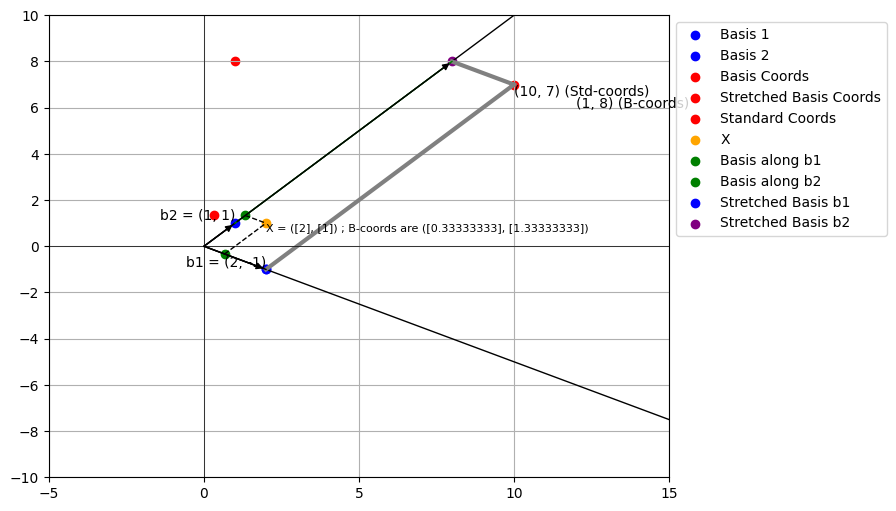

In [14]:
plot_graphs(P,D,P_inv,X)